In [1]:
from pitch import Pitch
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from scipy.stats import truncnorm

# Kernel density plot - heatmap

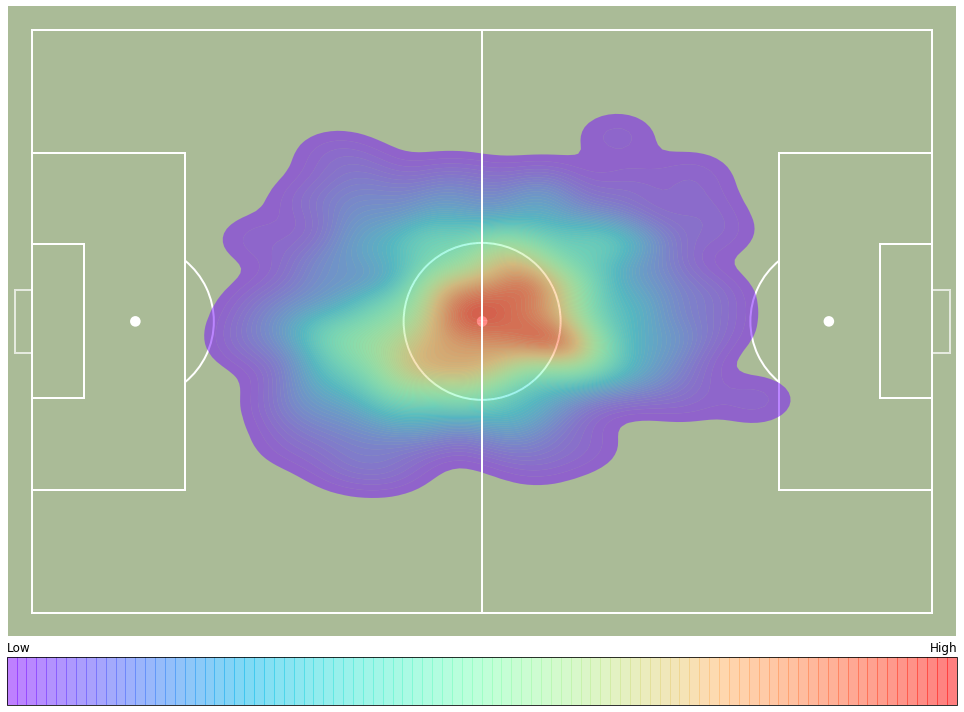

In [2]:
x1 = np.random.normal(loc=50, scale=10, size=500)
y1 = np.random.normal(loc=50, scale=10, size=500)
pitch = Pitch(pitch_type='opta',orientation='horizontal',view='full',layout=(1,1),figsize=(15,10),
              goal_type='box',linewidth=2)
fig, ax = pitch.draw()
pitch.kdeplot(x1,y1,ax=ax,shade=True,cmap="rainbow",
              shade_lowest=False,n_levels=100,alpha=0.5,antialiased=True,cbar=True,
              cbar_kws={'orientation':'horizontal','use_gridspec':True,'fraction':0.068,'ticks':[],'pad':0.03},)              
fig.axes[1].set_title('Low',loc='left');
fig.axes[1].set_title('High',loc='right');

# Kernel density plot - contour map

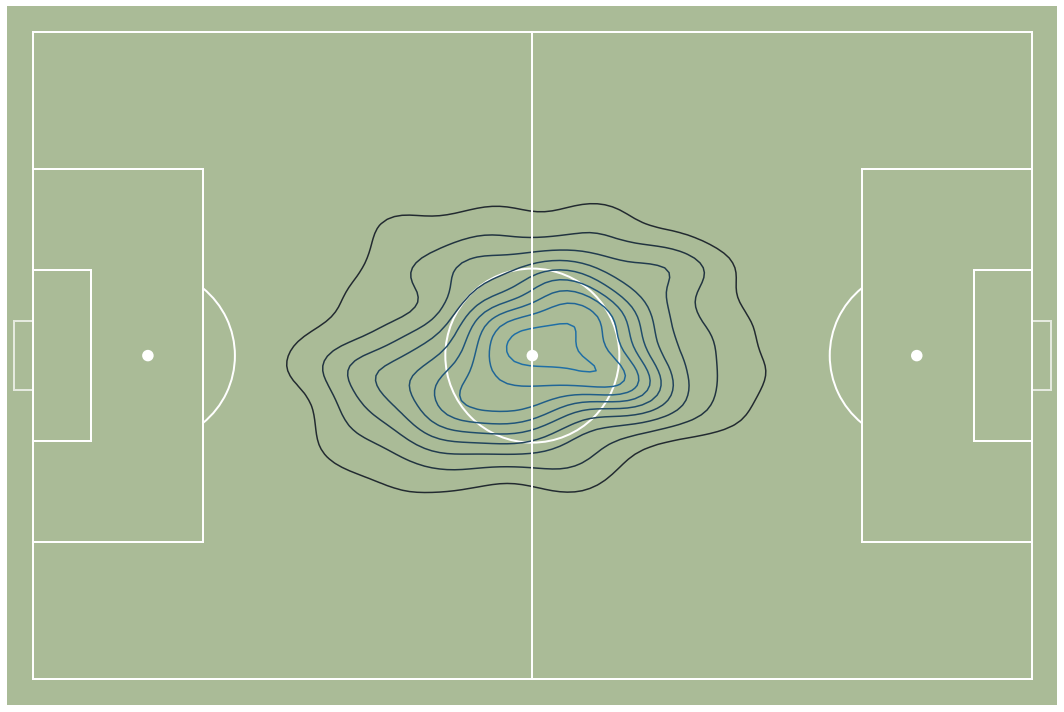

In [3]:
fig, ax = pitch.draw()
pitch.kdeplot(x1,y1,ax=ax)

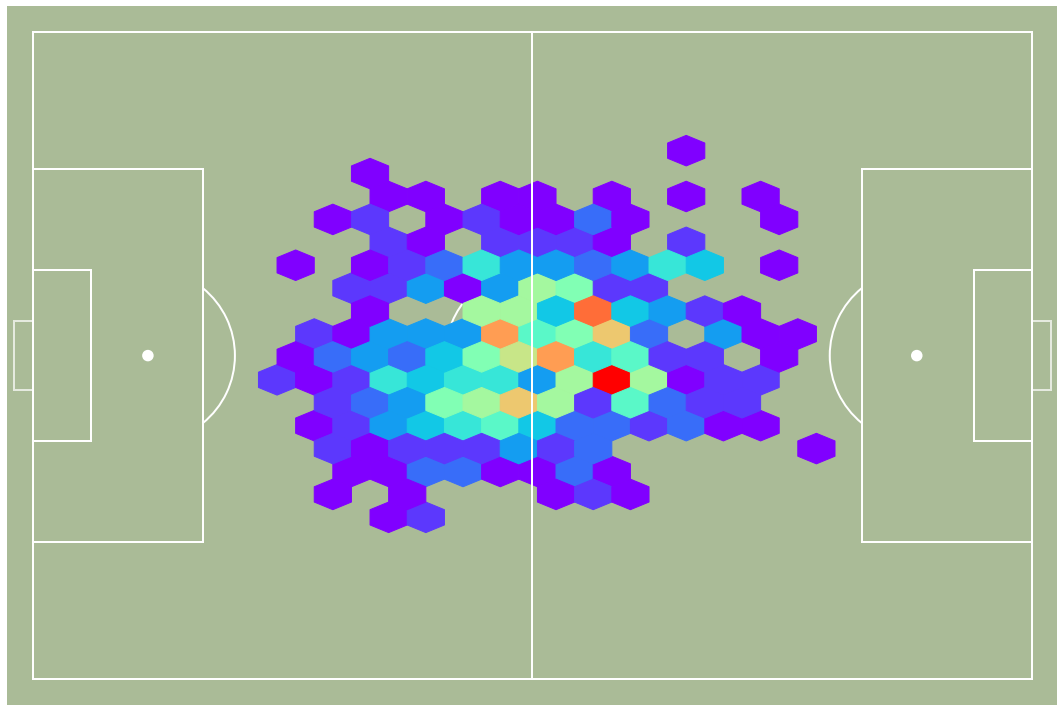

In [4]:
fig, ax = pitch.draw()
ax.hexbin(x1,y1,zorder=2,mincnt=1,cmap='rainbow',gridsize=15)

# Plot footballs

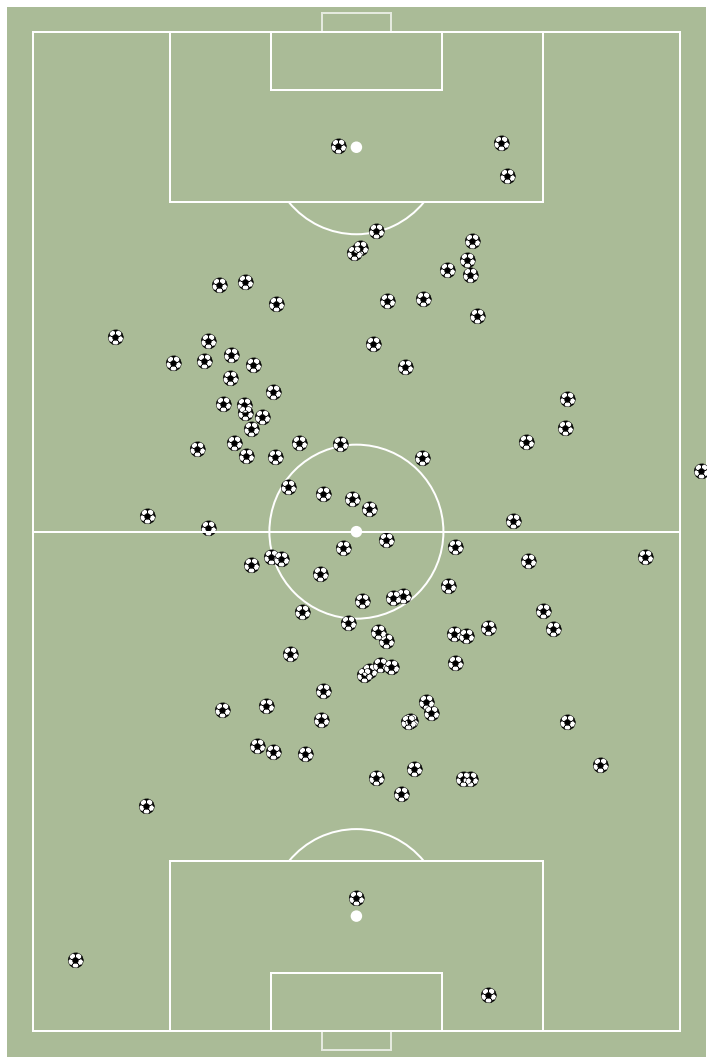

In [5]:
x1 = np.random.normal(loc=50, scale=20, size=100)
y1 = np.random.normal(loc=50, scale=20, size=100)
pitch = Pitch(pitch_type='opta',orientation='vertical',view='full',layout=(1,1),figsize=(10,15),
              goal_type='box',linewidth=2)
fig,ax = pitch.draw()
pitch.scatter(x1,y1, marker='football',alpha=1,s=250,ax=ax)

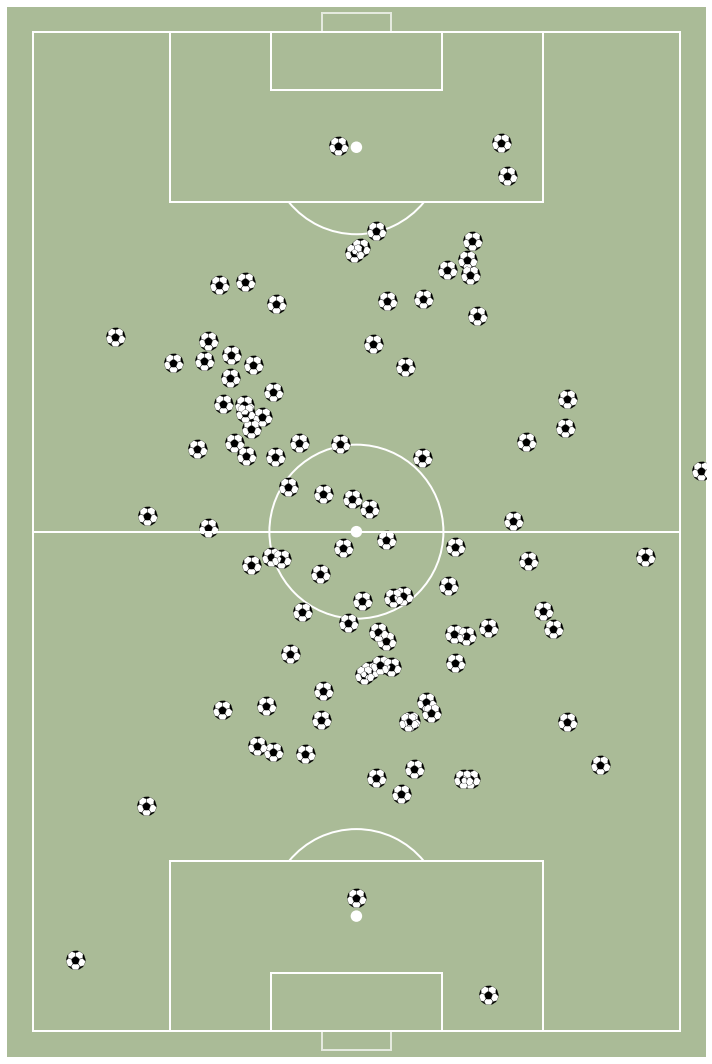

In [6]:
fig,ax = pitch.draw()
pitch.plot(x1,y1, marker='football',linestyle='None',alpha=1,ax=ax)

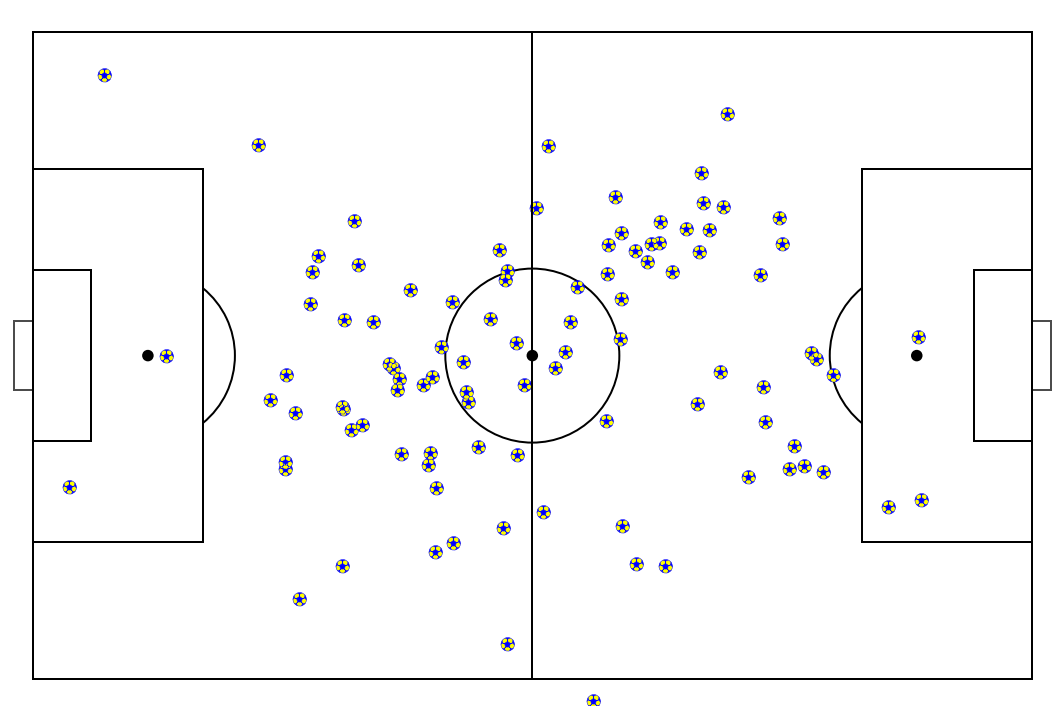

In [7]:
# facecolor is the color of the hexagons, edgecolor is the color of the pentagons
pitch = Pitch(pitch_type='opta',orientation='horizontal',view='full',layout=(1,1),figsize=(15,10),
              goal_type='box',linewidth=2,pitch_color='white',line_color='black')
fig,ax = pitch.draw()
pitch.scatter(x1,y1, marker='football',facecolor='yellow',edgecolor='blue',alpha=1,s=200,ax=ax)

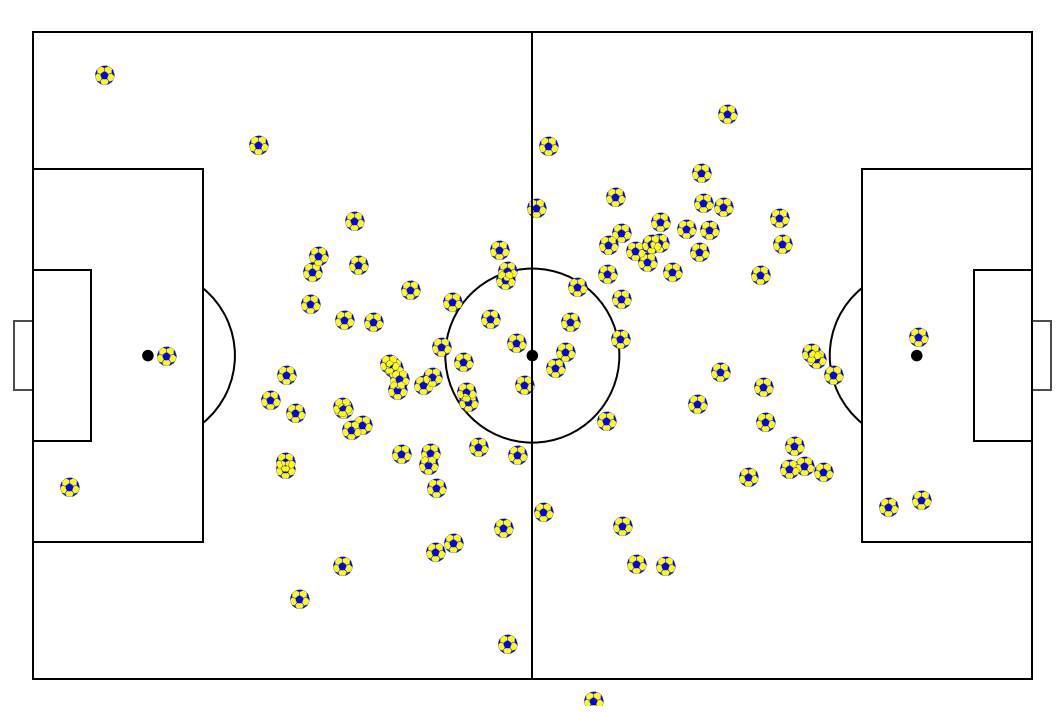

In [8]:
fig,ax = pitch.draw()
pitch.plot(x1,y1, marker='football',linestyle='None',markerfacecolor='yellow',markeredgecolor='blue',alpha=1,ax=ax)

# Statsbomb

In [9]:
# generate data
x = np.random.gamma(90, 1.1, 50)
x[x>120] = 110
y = np.random.normal(loc=40, scale=12, size=50)

#### Statsbomb vertical full

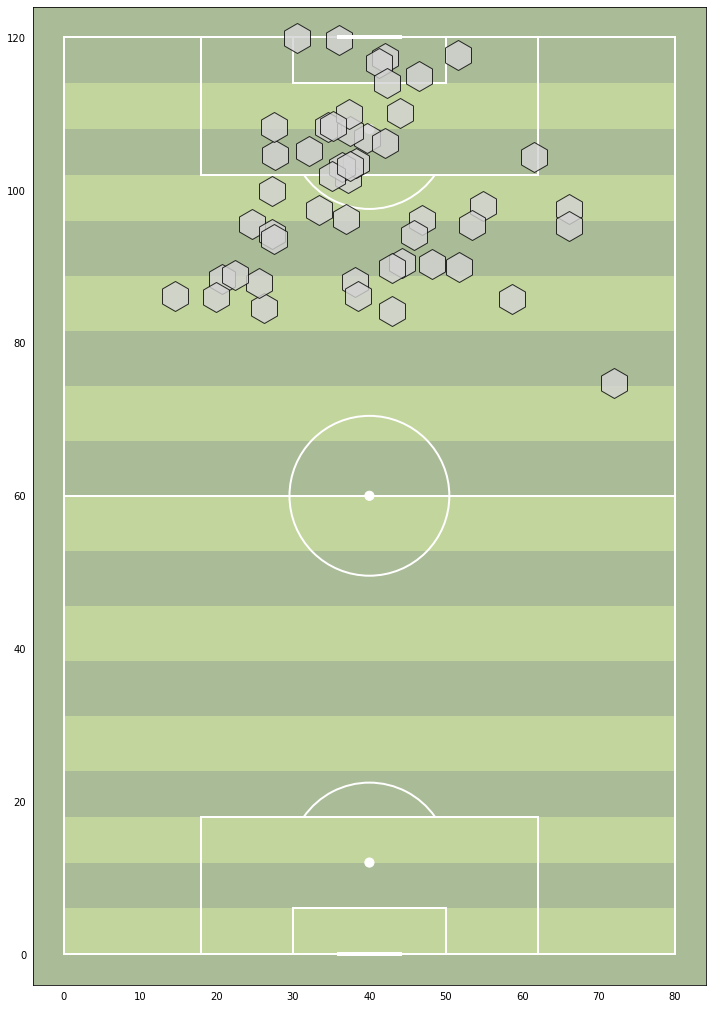

In [10]:
pitch = Pitch(pitch_type='statsbomb',orientation='vertical',view='full',figsize=(10,15),stripe=True,
              goal_type='line',axis=True,label=True)
fig,ax = pitch.draw()
pitch.plot(x,y, marker='h', color='#d3d3d3',markersize=30, markeredgecolor='black',alpha=0.8,linestyle='None',ax=ax)

#### Statsbomb horizontal full

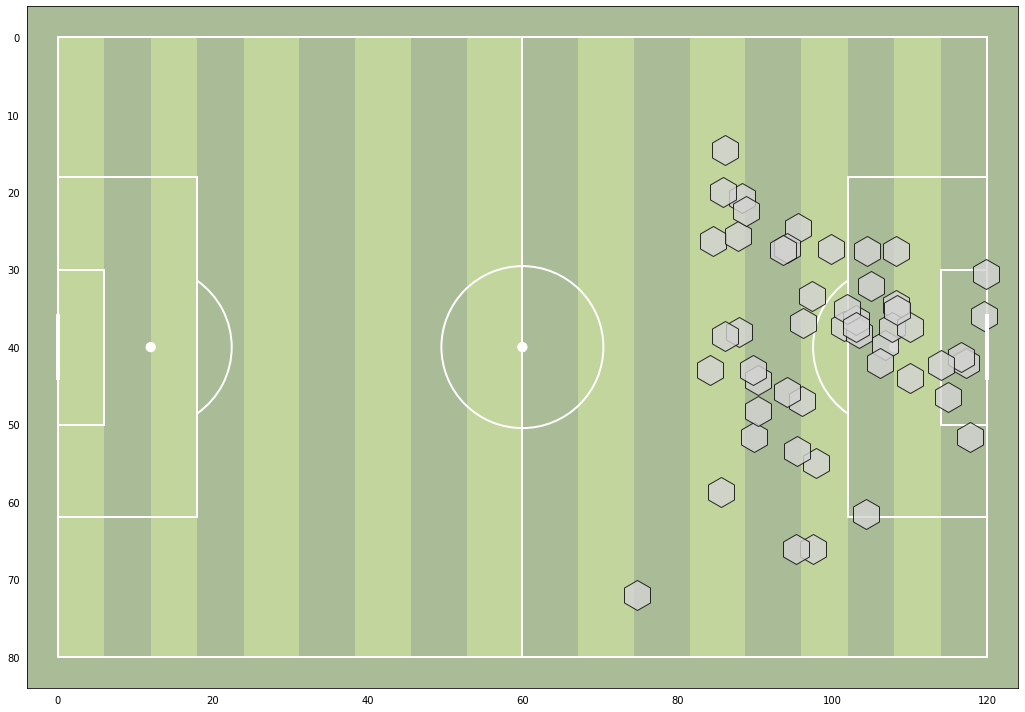

In [11]:
pitch = Pitch(pitch_type='statsbomb',orientation='horizontal',view='full',figsize=(15,10),stripe=True,
              goal_type='line',
              axis=True,label=True)
fig,ax = pitch.draw()
pitch.plot(x,y, marker='h', color='#d3d3d3',markersize=30,markeredgecolor='black',alpha=0.8,linestyle='None',ax=ax)

#### Statsbomb Horizontal half

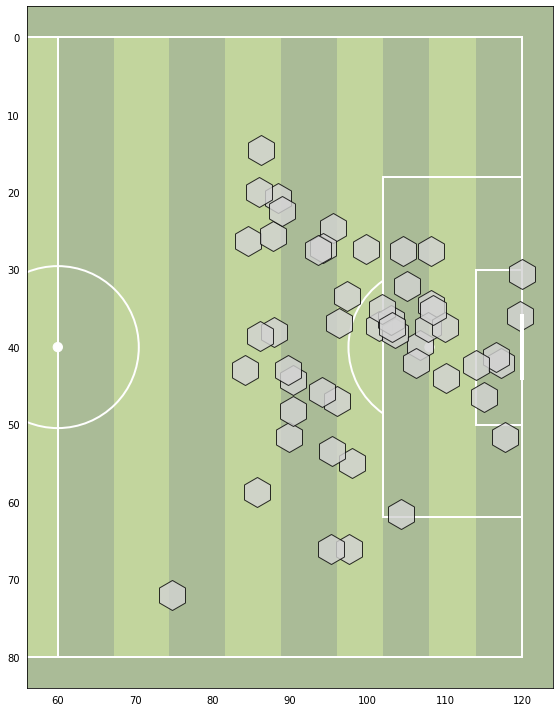

In [12]:
pitch = Pitch(pitch_type='statsbomb',orientation='horizontal',view='half',layout=(1,1),figsize=(15,10),stripe=True,
              goal_type='line',axis=True,label=True)
fig,ax = pitch.draw()
pitch.plot(x,y, marker='h', color='#d3d3d3',markersize=30,markeredgecolor='black',alpha=0.8,linestyle='None',ax=ax)

#### Statsbomb Vertical half

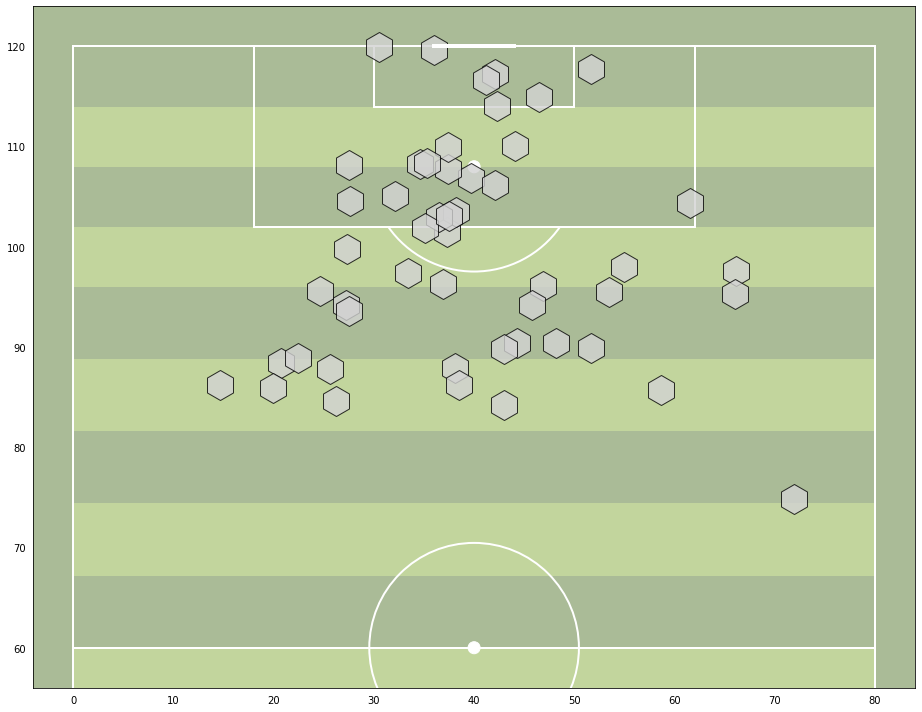

In [13]:
pitch = Pitch(pitch_type='statsbomb',orientation='vertical',view='half',layout=(1,1),figsize=(15,10),stripe=True,
              goal_type='line',axis=True,label=True)
fig,ax = pitch.draw()
pitch.plot(x,y, marker='h', color='#d3d3d3',markersize=30,markeredgecolor='black',alpha=0.8,linestyle='None',ax=ax)

# Opta

In [14]:
# generate data
x = np.random.gamma(75, 1.1, 50)
x[x>100] = 90
y = np.random.normal(loc=50, scale=12, size=50)

#### Opta vertical full

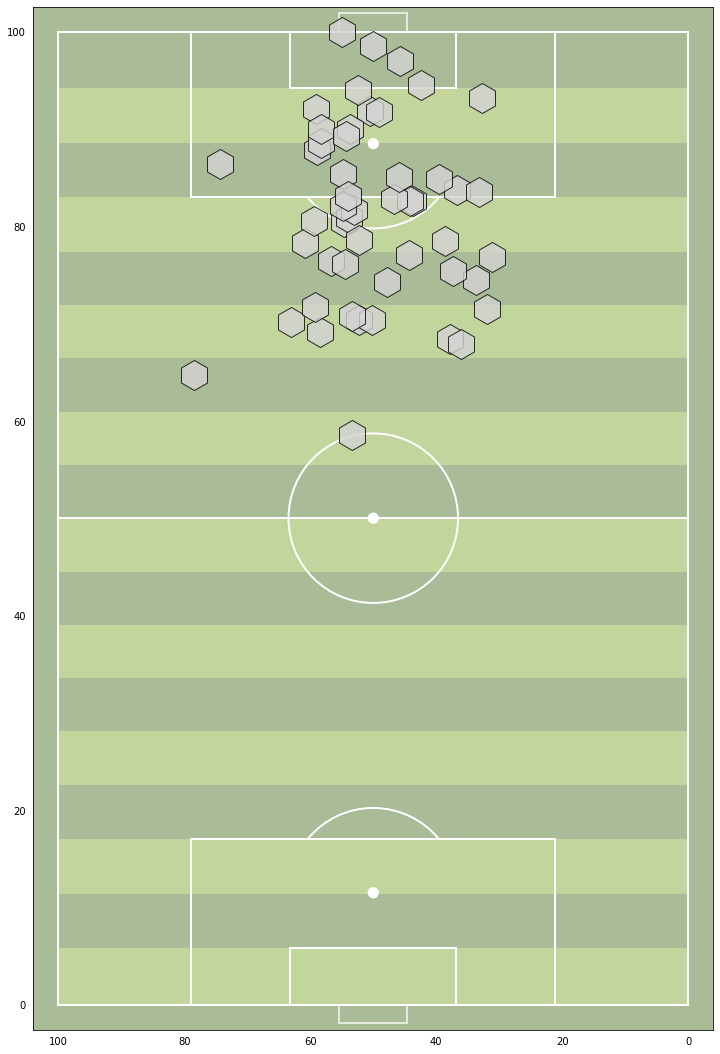

In [15]:
pitch = Pitch(pitch_type='opta',orientation='vertical',view='full',layout=(1,1),figsize=(10,15),stripe=True,
              goal_type='box',axis=True,label=True)
fig, ax = pitch.draw()
pitch.plot(x,y, marker='h', color='#d3d3d3',markersize=30,markeredgecolor='black',alpha=0.8,linestyle='None',ax=ax)

#### Opta horizontal full

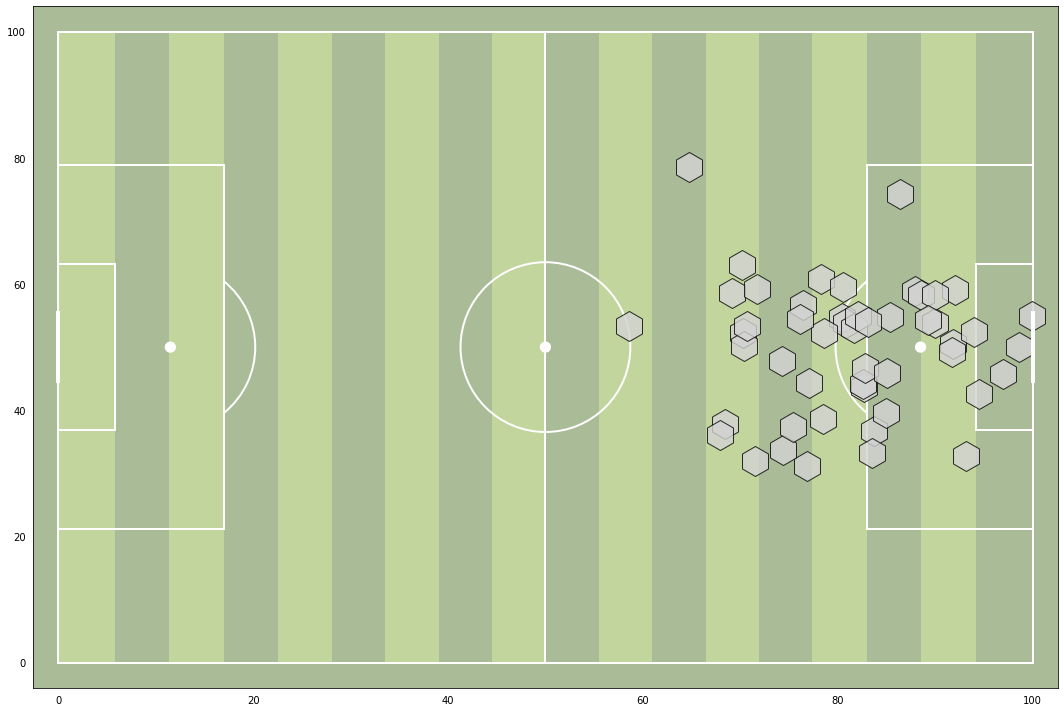

In [16]:
pitch = Pitch(pitch_type='opta',orientation='horizontal',view='full',layout=(1,1),figsize=(15,10),stripe=True,
              goal_type='line',axis=True,label=True)
fig, ax = pitch.draw()
pitch.plot(x,y, marker='h', color='#d3d3d3',markersize=30,markeredgecolor='black',alpha=0.8,linestyle='None',ax=ax)

#### Opta vertical half

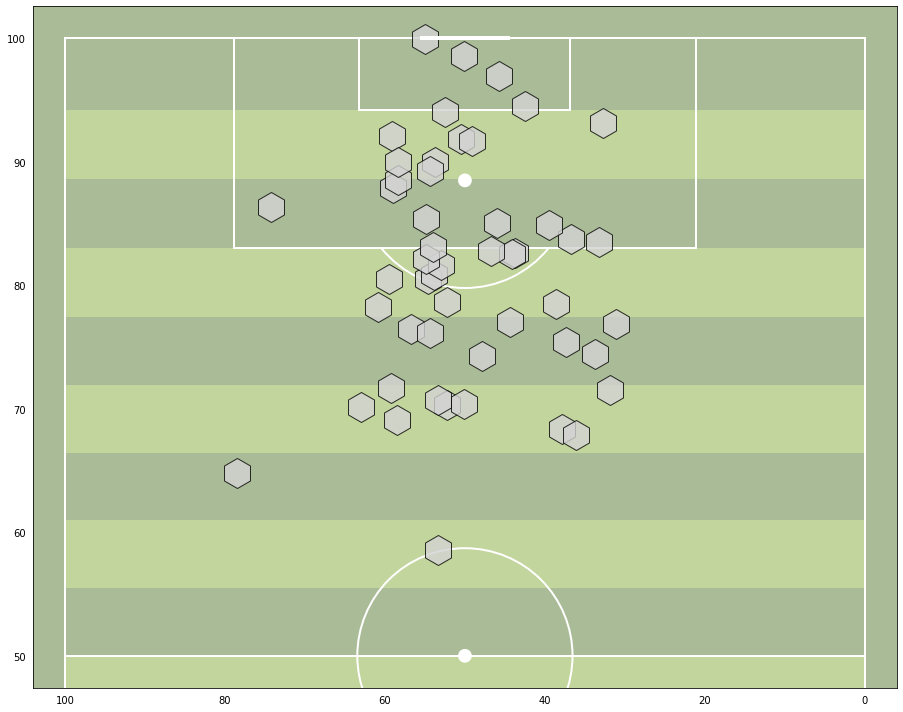

In [17]:
pitch = Pitch(pitch_type='opta',orientation='vertical',view='half',layout=(1,1),figsize=(15,10),stripe=True,goal_type='line',
              axis=True,label=True)
fig, ax = pitch.draw()
pitch.plot(x,y, marker='h', color='#d3d3d3',markersize=30,markeredgecolor='black',alpha=0.8,linestyle='None',ax=ax)

#### Opta Horizontal half

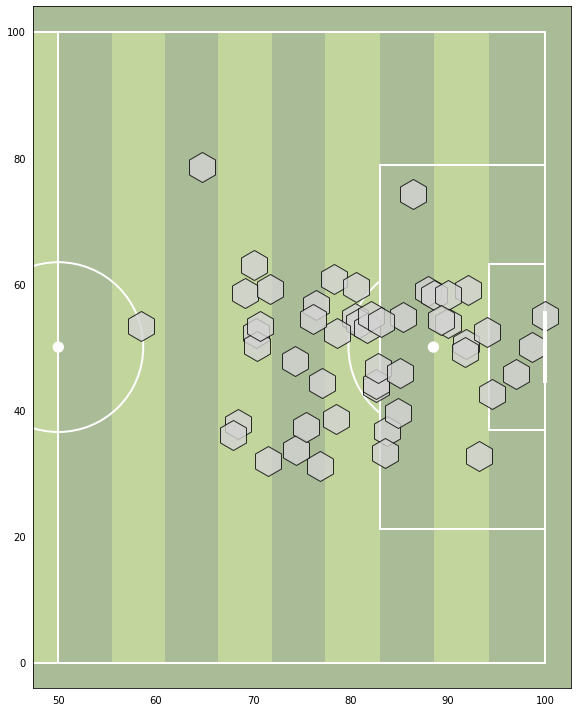

In [18]:
pitch = Pitch(pitch_type='opta',orientation='horizontal',view='half',layout=(1,1),figsize=(15,10),stripe=True,goal_type='line',
              axis=True,label=True)
fig, ax = pitch.draw()
pitch.plot(x,y, marker='h', color='#d3d3d3',markersize=30,markeredgecolor='black',alpha=0.8,linestyle='None',ax=ax)

# Tracab

In [19]:
# generate data
x = np.random.normal(loc=3600, scale=700, size=50)
x[x>5250] = 4500
y = np.random.normal(loc=0, scale=1000, size=50)

#### Tracab vertical full

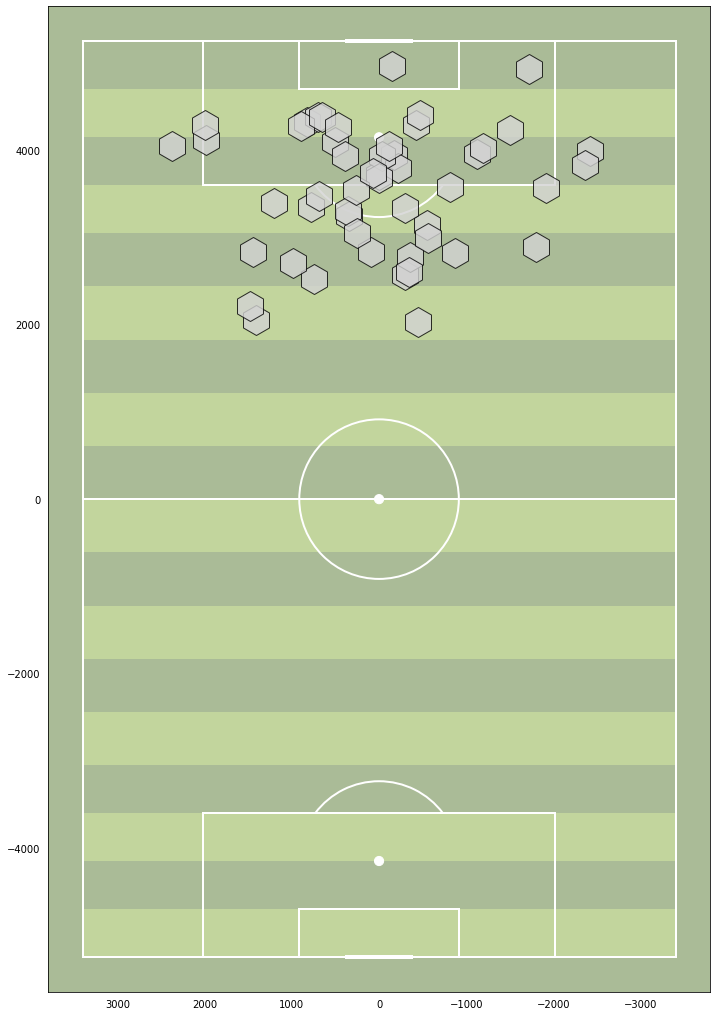

In [20]:
pitch = Pitch(pitch_type='tracab',orientation='vertical',view='full',layout=(1,1),figsize=(10,15),
              pitch_width=68,pitch_length=105,stripe=True,goal_type='line',axis=True,label=True)
fig, ax = pitch.draw()
pitch.plot(x,y, marker='h', color='#d3d3d3',markersize=30,markeredgecolor='black',alpha=0.8,linestyle='None',ax=ax)

#### Tracab horizontal full

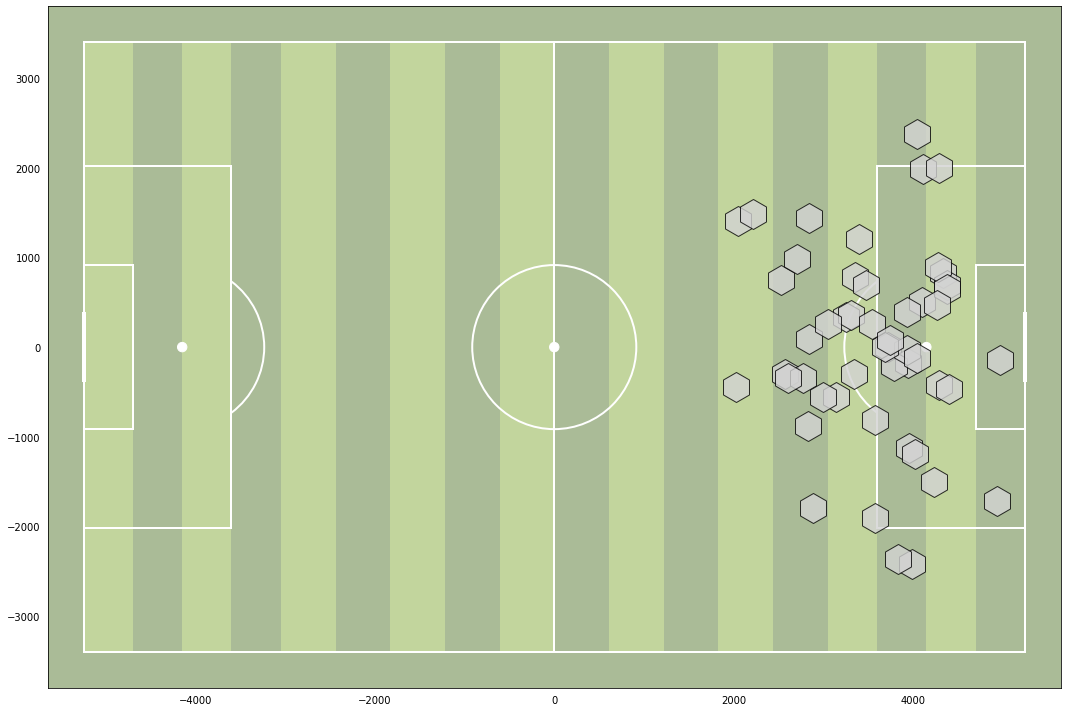

In [21]:
pitch = Pitch(pitch_type='tracab',orientation='horizontal',view='full',layout=(1,1),figsize=(15,10),
                  pitch_width=68,pitch_length=105,stripe=True,goal_type='line',axis=True,label=True)
fig, ax = pitch.draw()
pitch.plot(x,y, marker='h', color='#d3d3d3',markersize=30,markeredgecolor='black',alpha=0.8,linestyle='None',ax=ax)

#### Tracab vertical half

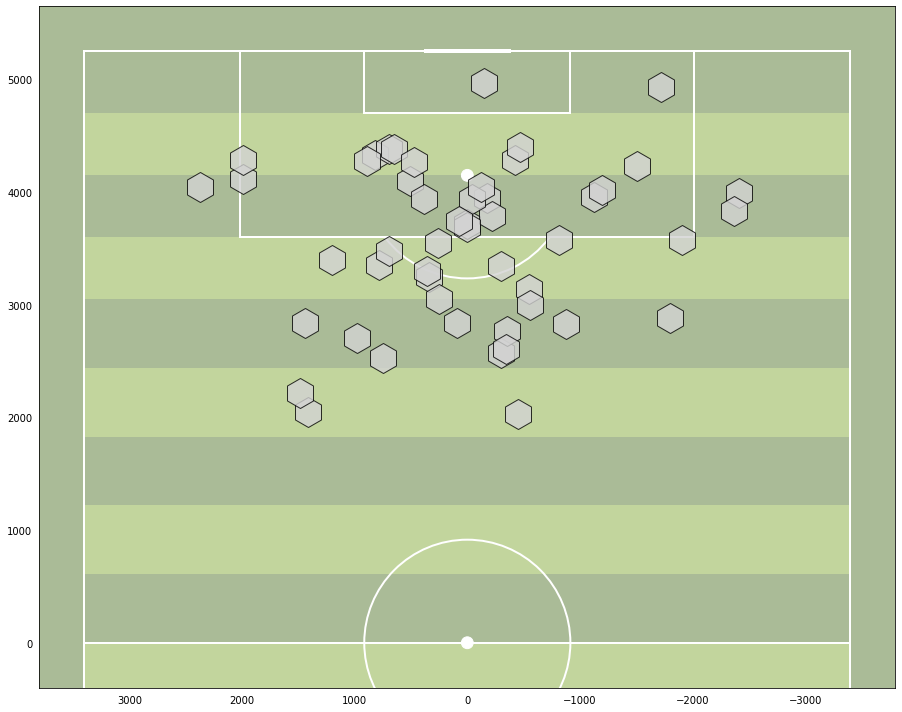

In [22]:
pitch = Pitch(pitch_type='tracab',orientation='vertical',view='half',layout=(1,1),figsize=(15,10),
                  pitch_width=68,pitch_length=105,stripe=True,goal_type='line',axis=True,label=True)
fig, ax = pitch.draw()
pitch.plot(x,y, marker='h', color='#d3d3d3',markersize=30,markeredgecolor='black',alpha=0.8,linestyle='None',ax=ax)

#### Tracab Horizontal half

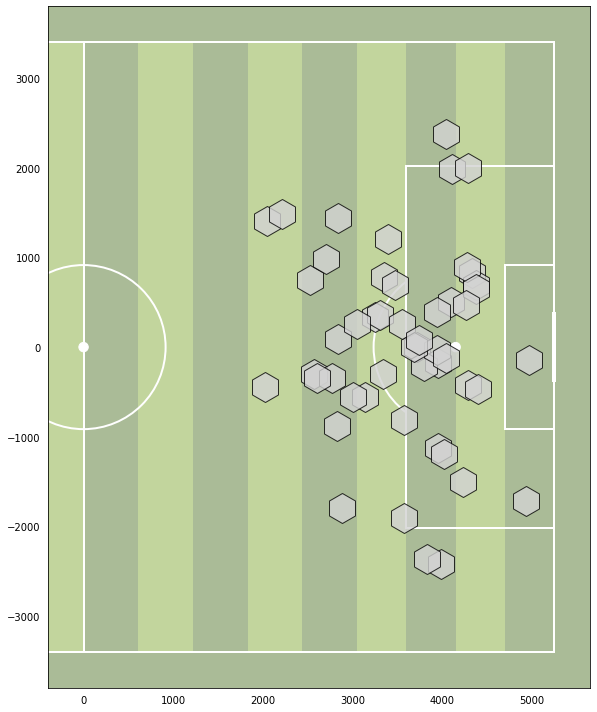

In [23]:
pitch = Pitch(pitch_type='tracab',orientation='horizontal',view='half',layout=(1,1),figsize=(15,10),
                  pitch_width=68,pitch_length=105,stripe=True,goal_type='line',axis=True,label=True)
fig, ax = pitch.draw()
pitch.plot(x,y, marker='h', color='#d3d3d3',markersize=30,markeredgecolor='black',alpha=0.8,linestyle='None',ax=ax)

# Stats.com

In [24]:
# generate data
x = np.random.gamma(75, 1.1, 50)
x[x>100] = 90
y = np.random.normal(loc=35, scale=12, size=50)

#### stats.com vertical full

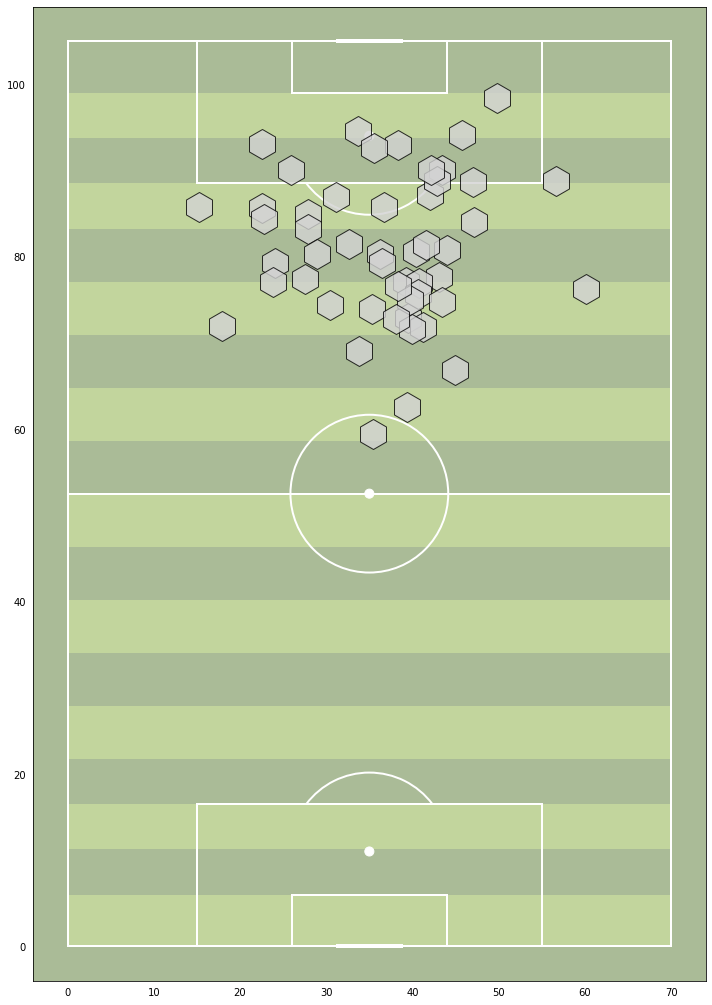

In [25]:
pitch = Pitch(pitch_type='stats',orientation='vertical',view='full',figsize=(10,15),stripe=True,
              goal_type='line',axis=True,label=True)
fig, ax = pitch.draw()
pitch.plot(x,y, marker='h', color='#d3d3d3',markersize=30,markeredgecolor='black',alpha=0.8,linestyle='None',ax=ax)

#### stats.com horizontal full

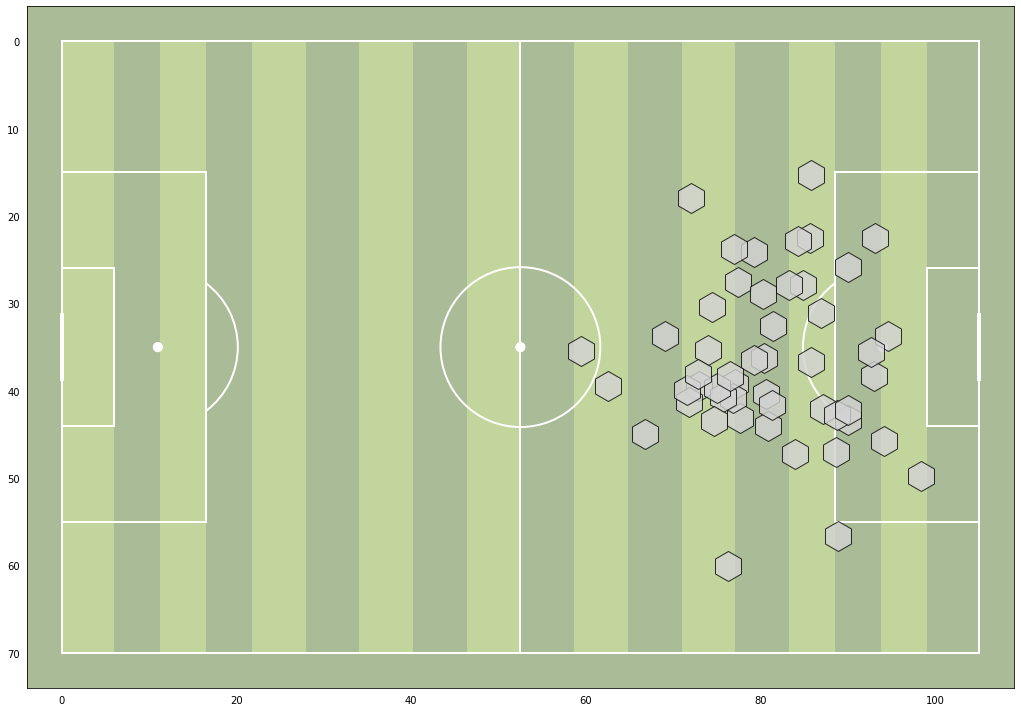

In [26]:
pitch = Pitch(pitch_type='stats',orientation='horizontal',view='full',layout=(1,1),figsize=(15,10),stripe=True,
              goal_type='line',axis=True,label=True)
fig, ax = pitch.draw()
pitch.plot(x,y, marker='h', color='#d3d3d3',markersize=30,markeredgecolor='black',alpha=0.8,linestyle='None',ax=ax)

#### stats.com vertical half

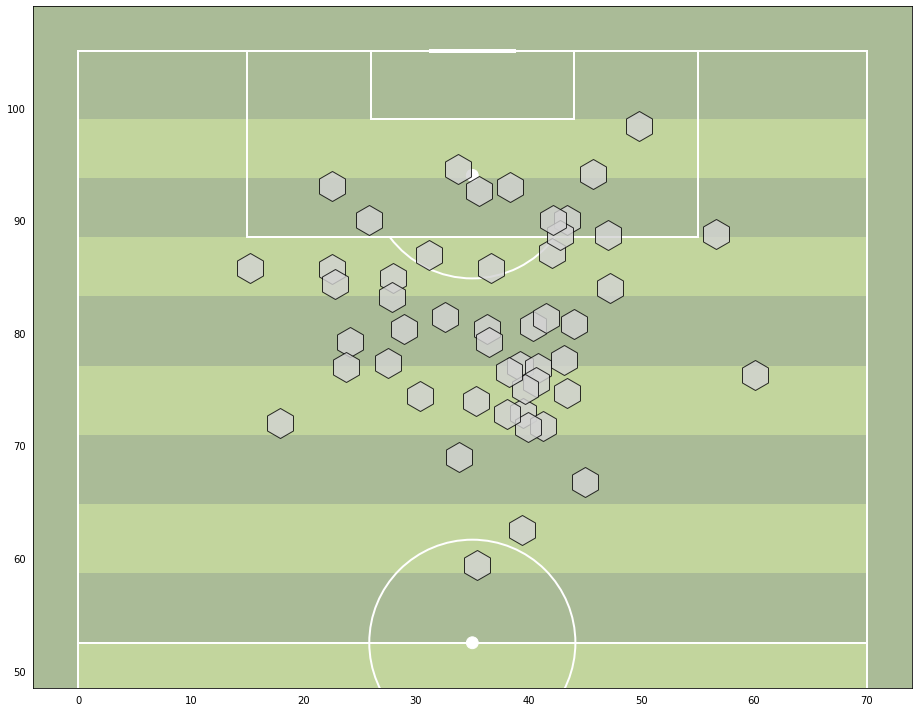

In [27]:
pitch = Pitch(pitch_type='stats',orientation='vertical',view='half',layout=(1,1),figsize=(15,10),stripe=True,
              goal_type='line',axis=True,label=True)
fig, ax = pitch.draw()
pitch.plot(x,y, marker='h', color='#d3d3d3',markersize=30,markeredgecolor='black',alpha=0.8,linestyle='None',ax=ax)

#### stats.com Horizontal half

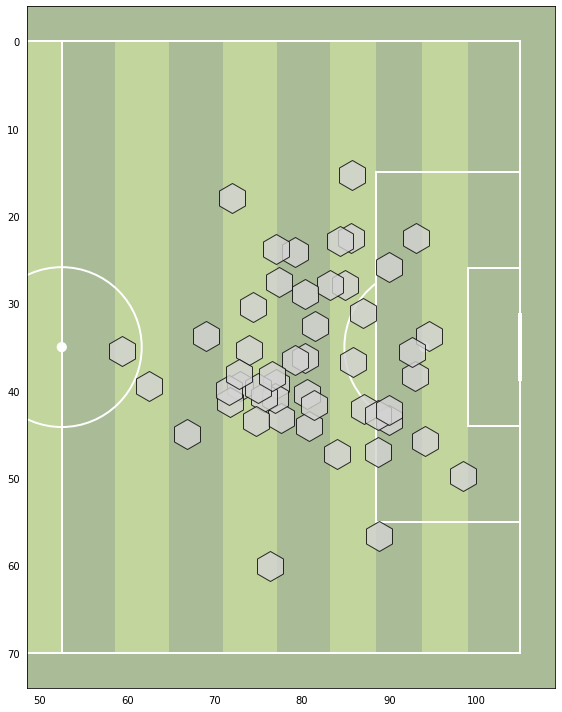

In [28]:
pitch = Pitch(pitch_type='stats',orientation='horizontal',view='half',layout=(1,1),figsize=(15,10),stripe=True,
              goal_type='line',axis=True,label=True)
fig, ax = pitch.draw()
pitch.plot(x,y, marker='h', color='#d3d3d3',markersize=30,markeredgecolor='black',alpha=0.8,linestyle='None',ax=ax)

# Wyscout

In [29]:
# generate data
x = np.random.gamma(75, 1.1, 50)
x[x>100] = 90
y = np.random.normal(loc=50, scale=12, size=50)

#### wyscout vertical full

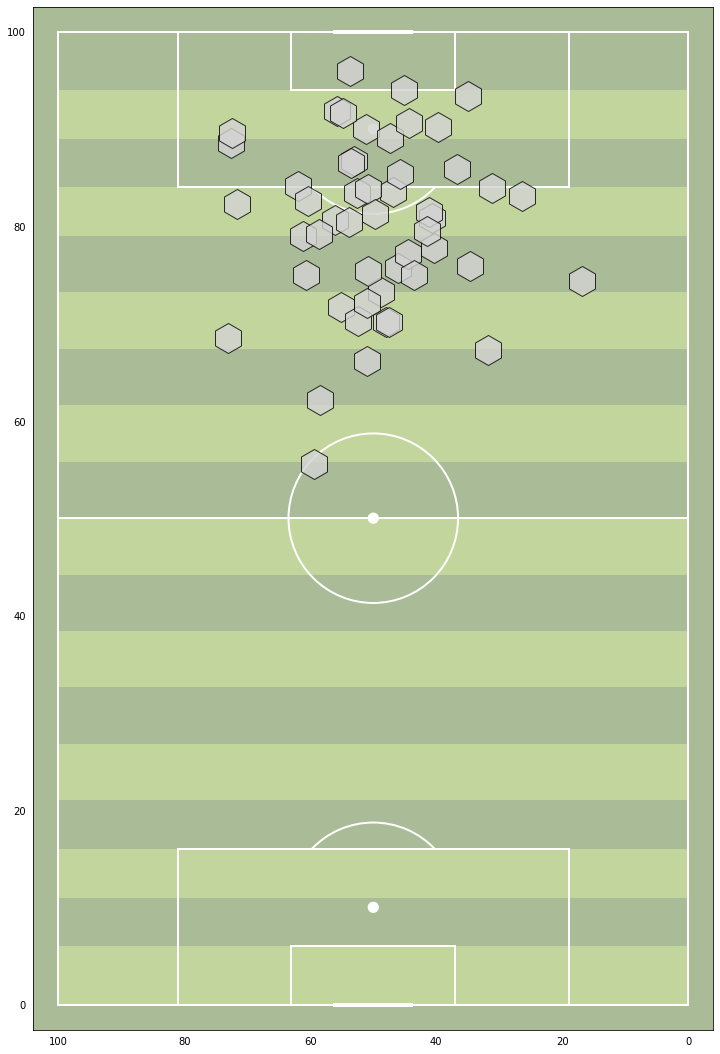

In [30]:
pitch = Pitch(pitch_type='wyscout',orientation='vertical',view='full',figsize=(10,15),stripe=True,
              goal_type='line',axis=True,label=True)
fig, ax = pitch.draw()
pitch.plot(x,y, marker='h', color='#d3d3d3',markersize=30,markeredgecolor='black',alpha=0.8,linestyle='None',ax=ax)

#### wyscout horizontal full

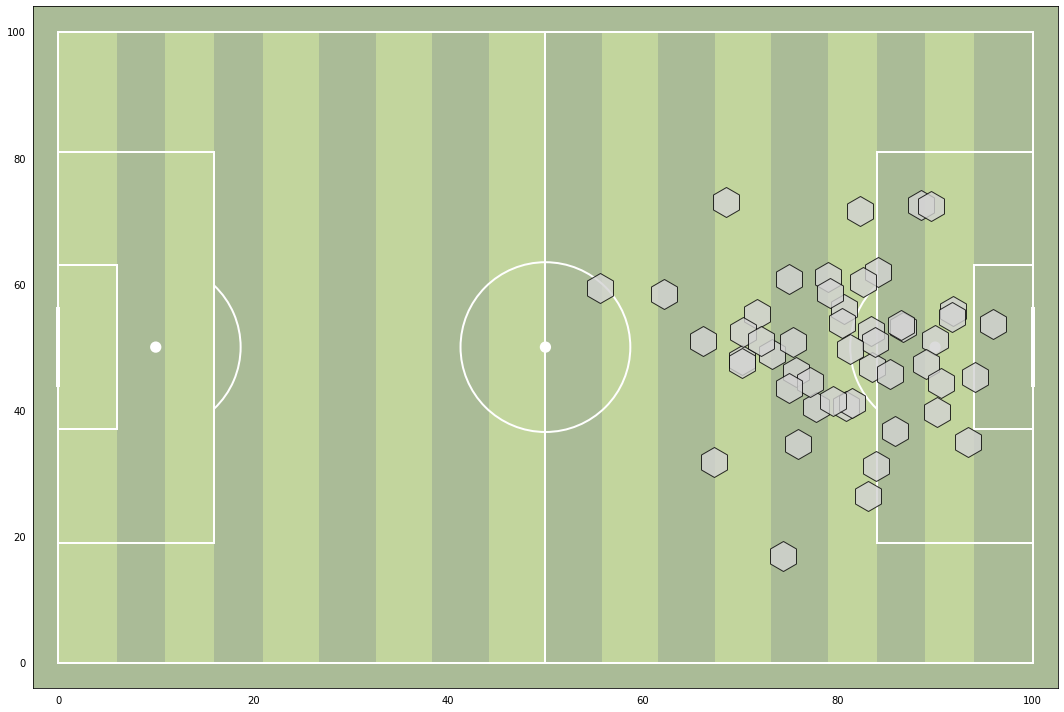

In [31]:
pitch = Pitch(pitch_type='wyscout',orientation='horizontal',view='full',layout=(1,1),figsize=(15,10),stripe=True,
              goal_type='line',axis=True,label=True)
fig, ax = pitch.draw()
pitch.plot(x,y, marker='h', color='#d3d3d3',markersize=30,markeredgecolor='black',alpha=0.8,linestyle='None',ax=ax)

#### wyscout vertical half

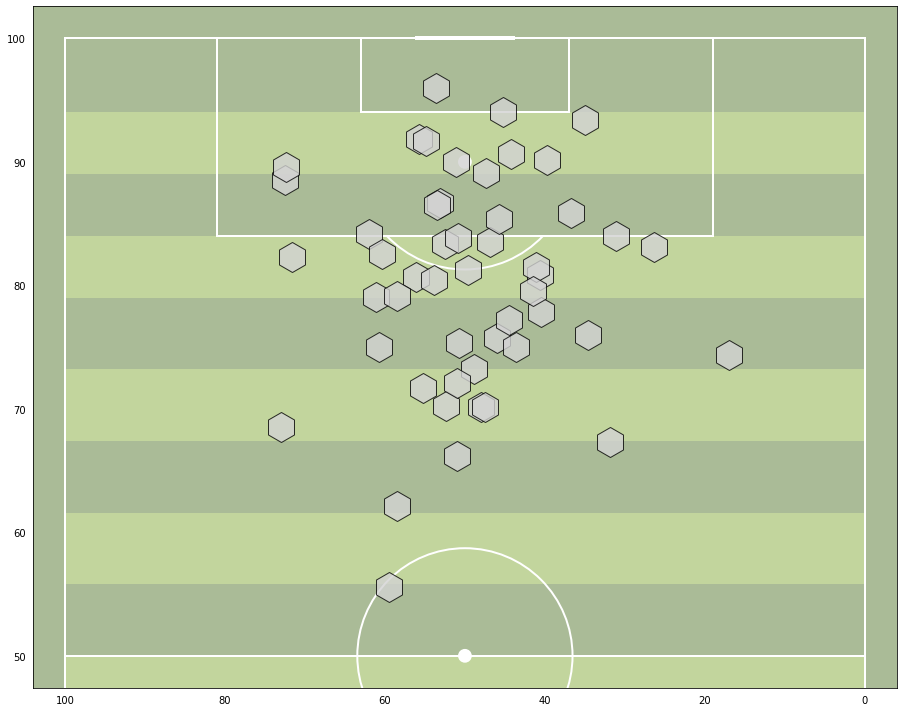

In [32]:
pitch = Pitch(pitch_type='wyscout',orientation='vertical',view='half',layout=(1,1),figsize=(15,10),stripe=True,
              goal_type='line',axis=True,label=True)
fig, ax = pitch.draw()
pitch.plot(x,y, marker='h', color='#d3d3d3',markersize=30,markeredgecolor='black',alpha=0.8,linestyle='None',ax=ax)

#### wyscout Horizontal half

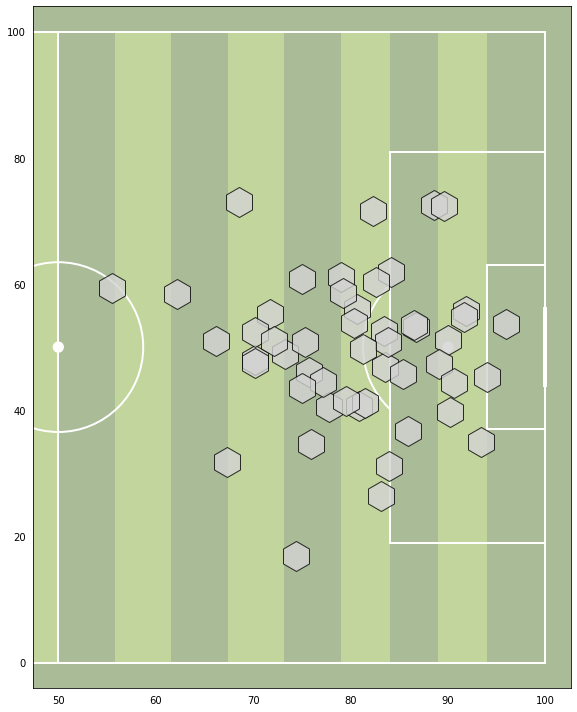

In [33]:
pitch = Pitch(pitch_type='wyscout',orientation='horizontal',view='half',layout=(1,1),figsize=(15,10),stripe=True,
              goal_type='line',axis=True,label=True)
fig, ax = pitch.draw()
pitch.plot(x,y, marker='h', color='#d3d3d3',markersize=30,markeredgecolor='black',alpha=0.8,linestyle='None',ax=ax)

# Plot multiple

In [34]:
# generate data
x = np.random.gamma(90, 1.1, 50)
x[x>120] = 110
y = np.random.normal(loc=40, scale=12, size=50)

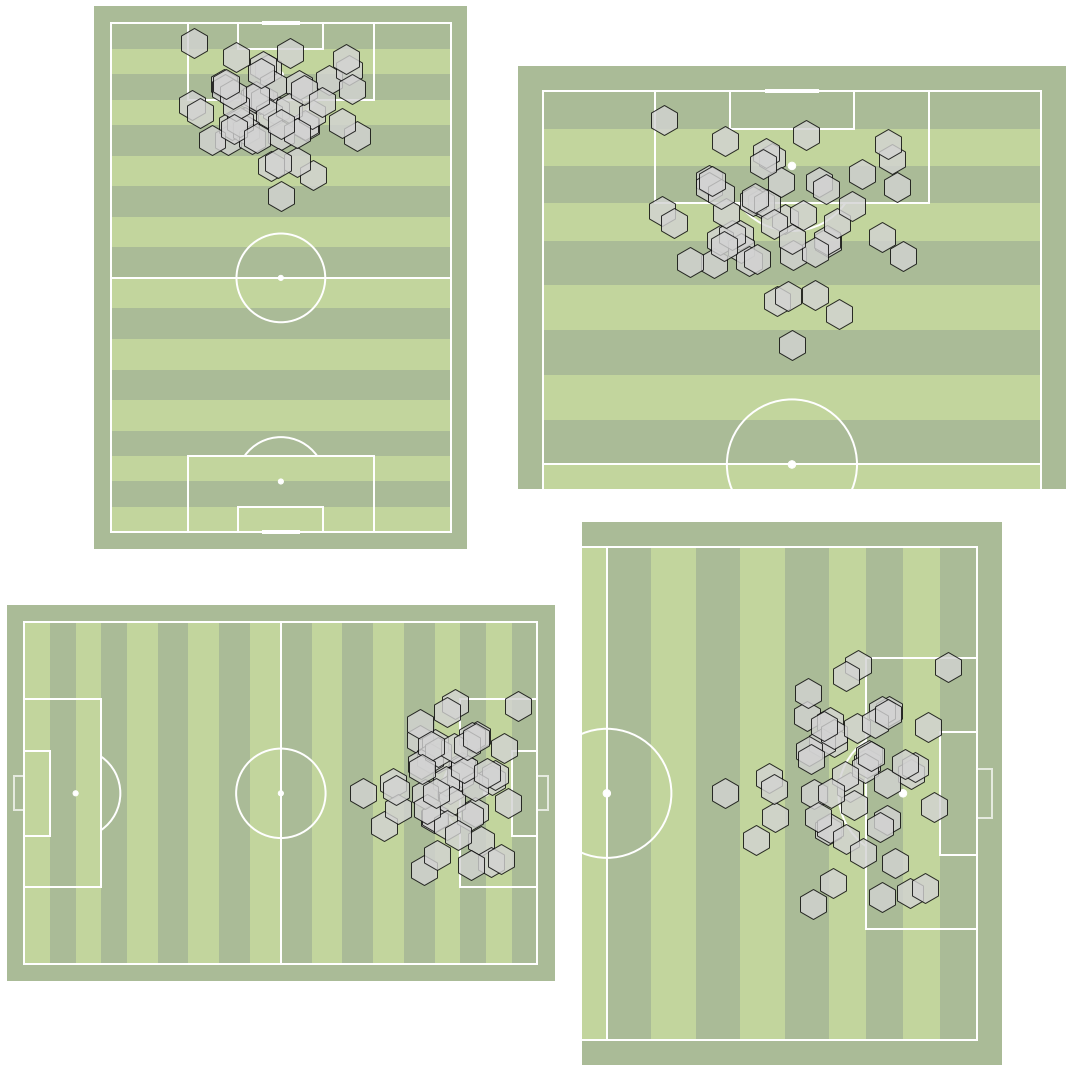

In [35]:
pitch_vf = Pitch(pitch_type='statsbomb',orientation='vertical',view='full', goal_type='line',stripe=True)
pitch_vh = Pitch(pitch_type='statsbomb',orientation='vertical',view='half', goal_type='line',stripe=True)
pitch_hf = Pitch(pitch_type='statsbomb',orientation='horizontal',view='full', goal_type='box',stripe=True)
pitch_hh = Pitch(pitch_type='statsbomb',orientation='horizontal',view='half', goal_type='box',stripe=True)
fig, ax = plt.subplots(nrows=2, ncols=2,figsize=(15,15))
pitch_vf.draw(ax[0,0])
pitch_vh.draw(ax[0,1])
pitch_hf.draw(ax[1,0])
pitch_hh.draw(ax[1,1])
pitch_vf.plot(x,y, marker='h', color='#d3d3d3',markersize=30,markeredgecolor='black',alpha=0.8,linestyle='None',ax=ax[0,0])
pitch_vh.plot(x,y, marker='h', color='#d3d3d3',markersize=30,markeredgecolor='black',alpha=0.8,linestyle='None',ax=ax[0,1])
pitch_hf.plot(x,y, marker='h', color='#d3d3d3',markersize=30,markeredgecolor='black',alpha=0.8,linestyle='None',ax=ax[1,0])
pitch_hh.plot(x,y, marker='h', color='#d3d3d3',markersize=30,markeredgecolor='black',alpha=0.8,linestyle='None',ax=ax[1,1])
fig.set_tight_layout(True)